In [1]:
import plot_utils as pu
from hiro_models.one_qubit_model import StocProcTolerances
from hiro_models.otto_cycle import OttoEngine
import hiro_models.model_auxiliary as aux
import numpy as np
import qutip as qt
import utilities as ut
import stocproc
import matplotlib.pyplot as plt
import otto_utilities as ot
import shift_cycle as sc
import ray
import figsaver as fs
ray.shutdown()

#ray.init(address='auto')
ray.init()
from hops.util.logging_setup import logging_setup
import logging
logging_setup(logging.INFO)


In [2]:
shifts = sc.make_shifts(extra_r=4)
import itertools
models = [sc.make_model(shift, shift) for shift in shifts]
baseline = models[3]

3.5999999999999996
3.5999999999999996
3.5999999999999996
3.5999999999999996
3.5999999999999996
3.5999999999999996
3.5999999999999996
3.5999999999999996
3.5999999999999996
3.5999999999999996
3.5999999999999996


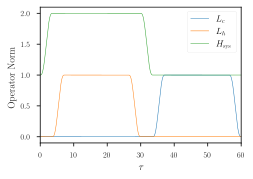

In [3]:
ot.plot_cycle(baseline)
fs.export_fig("cycle_prototype", y_scaling=.7)

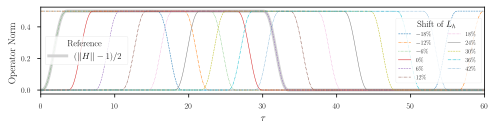

In [4]:
#ot.plot_cycles(models, bath=0, legend=True)
from itertools import cycle
lines = ["--","-.",":", "-"]
linecycler = cycle(lines)

fig, ax = plt.subplots()
t = np.linspace(0, models[0].Θ, 1000)
l, = ax.plot(t, models[0].H.operator_norm(t)/2-.5, linewidth=3, color="lightgrey")
legend_1 = ax.legend([l], [r"$(||H||-1)/2$"], loc="center left", title="Reference")
from cycler import cycler
for model in models:
    ax.plot(t, model.coupling_operators[1].operator_norm(t), label=fr"${model.L_shift[0] * 100:.0f}\%$", linestyle=(next(linecycler)))
ax.legend(title=r"Shift of $L_h$", fontsize="x-small", ncols=2)
ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"Operator Norm")
ax.add_artist(legend_1)
ax.set_xlim((0, models[0].Θ))
fs.export_fig("cycle_shift_shifts", x_scaling=2, y_scaling=.5)